### 3. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('preprocessed_dataframe.csv')
df.date_registered = pd.to_datetime(df['date_registered'])

#### 3.1 Check for Data imbalance

<AxesSubplot:>

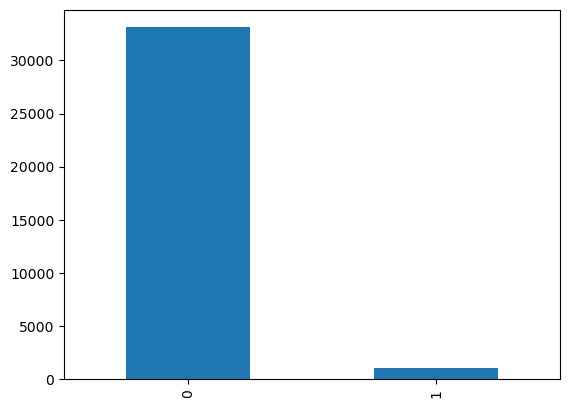

In [3]:
# plot the bar chart representing the count of students who paid and those who didn't
tempVar = df.paid.value_counts()
tempVar.plot.bar(x=tempVar.index, y=tempVar.values)

As we can see, the data is highly imbalanced and therefore will need to be balanced before fitting on any ML model.

#### 3.2 Univariate analysis for student_country 

<AxesSubplot:>

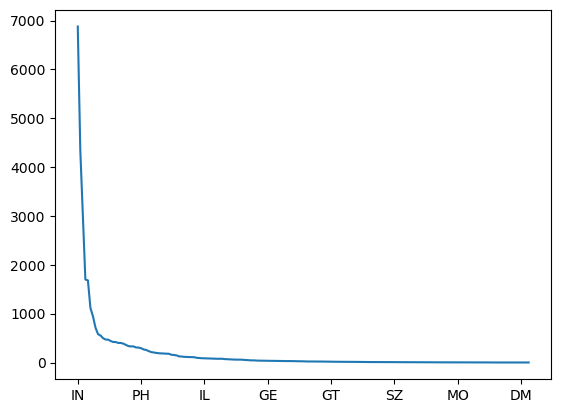

In [4]:
df.student_country.value_counts().plot()

Majority of students are from India followed by Phillipines and Israel, etc.

**Query :** Majority of students are from India, is this true for both paid and non-paid users, i.e. users who eventaully bought subscriptions and those that didn't ?

Text(0.5, 1.0, 'Students registered as free-tier users and their country of origin')

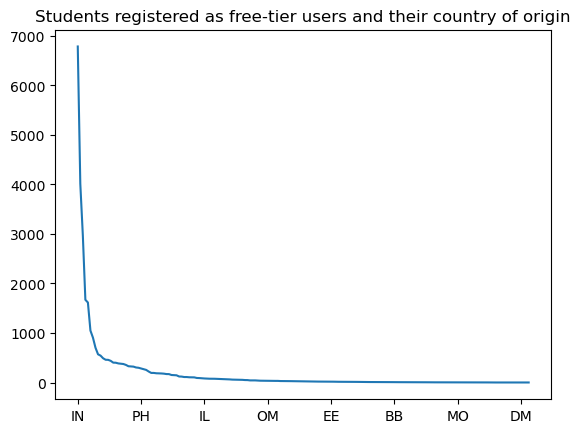

In [5]:
df[df.paid == 0 ].student_country.value_counts().plot()
plt.title('Students registered as free-tier users and their country of origin')

Text(0.5, 1.0, 'Students registered as paid-tier users and their country of origin')

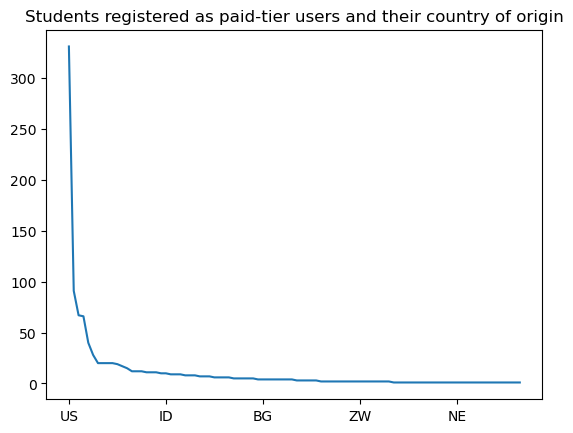

In [6]:
df[df.paid == 1 ].student_country.value_counts().plot()
plt.title("Students registered as paid-tier users and their country of origin")

**Answer :** 
As evident from the graph above, students from IN are present in both the categories i.e. paid and non-paid however, students from US are more likely to buy paid subscription than those in IN. Also, one other observation here is that IN is the only country that is common among the top 5 countries for both the paid and non-paid categories. Thus, we can say that nationality does play an important role in determining how likely the user is to buy the paid subscription. 

#### 3.3 Univariate  analysis for date_registered column

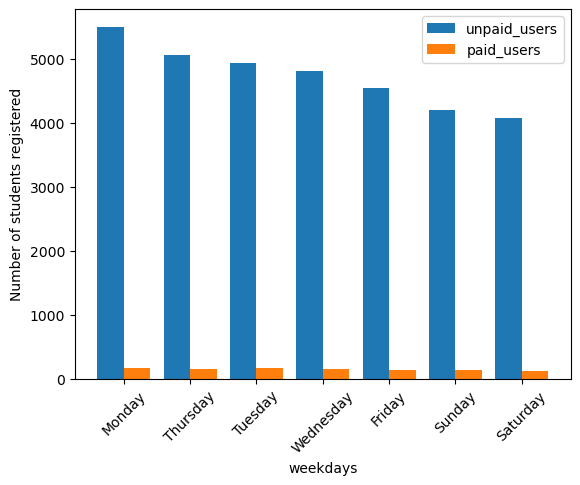

In [59]:
unpaid_weekdays = df[df.paid==0].date_registered.dt.day_name().value_counts().to_dict()
paid_weekdays = df[df.paid==1].date_registered.dt.day_name().value_counts().to_dict()

X = list(unpaid_weekdays.keys())
Y_unpaid_weekdays = [ unpaid_weekdays[key] for key in X ]
Y_paid_weekdays = [ paid_weekdays[key] for key in X ]
X_axis = np.arange(len(X))
plt.bar( X_axis -.2, Y_unpaid_weekdays, .4, label='unpaid_users')
plt.bar( X_axis +.2, Y_paid_weekdays, .4, label='paid_users')

plt.xticks(X_axis, X, rotation=45)
plt.xlabel("weekdays")
plt.ylabel("Number of students registered")
plt.legend()
plt.show()

<AxesSubplot:>

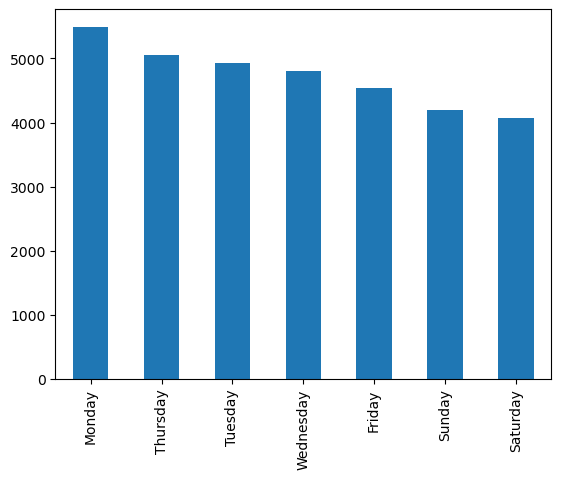

In [61]:
df[df.paid==0].date_registered.dt.day_name().value_counts().plot.bar()

<AxesSubplot:>

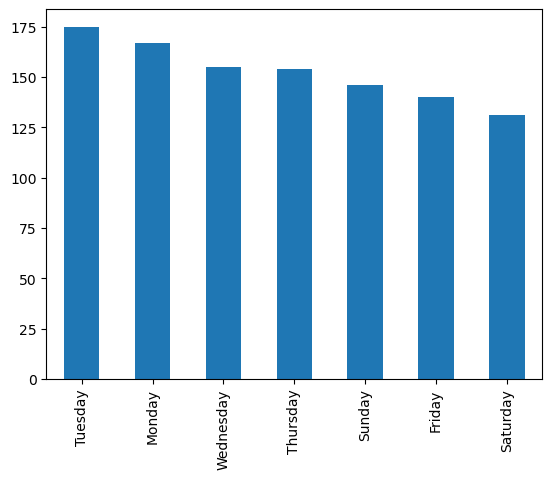

In [64]:
df[df.paid==1].date_registered.dt.day_name().value_counts().plot.bar()

From the bar charts above it seems, paid users are more likely to register on tuesday, however, this might be because of sampling bias and we do not have enough number of records, so we cannot make any conclusion with respect to student converting to paid or not based on the day he/she registers.

<AxesSubplot:>

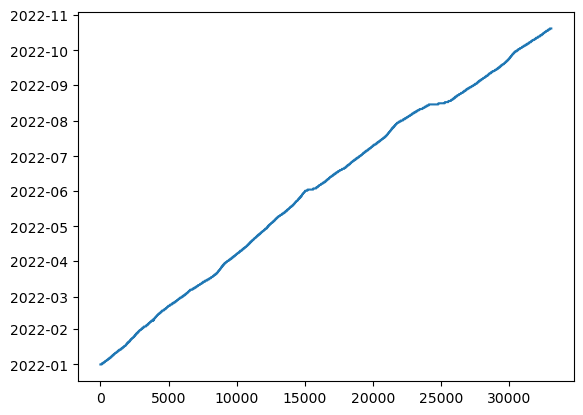

In [63]:
df[df.paid==0].reset_index().date_registered.plot()

<AxesSubplot:>

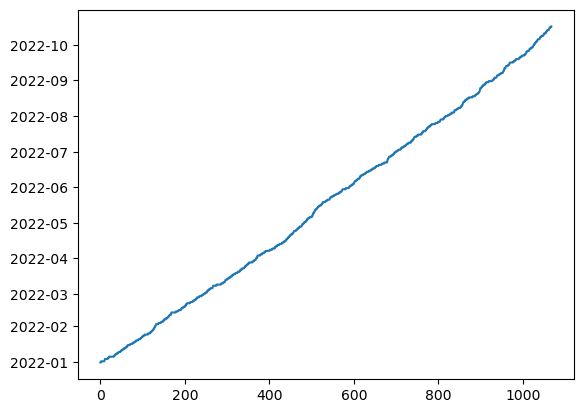

In [8]:
df[df.paid==1].reset_index().date_registered.plot()

For both paid and unpaid users, the the graph is almost same and so, no clear distinction can be made about those two classes from registered date.

#### 3.4 Bivariate analysis of num_rated_courses

<AxesSubplot:xlabel='paid', ylabel='num_rated_courses'>

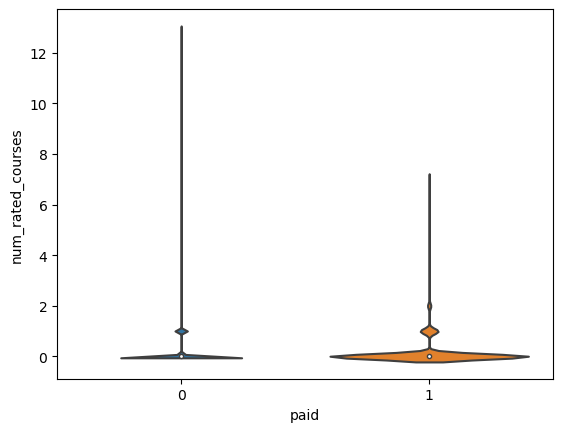

In [9]:
sns.violinplot(data=df, x='paid', y='num_rated_courses')

In [10]:
df[df.paid==1].num_rated_courses.describe()

count    1068.000000
mean        0.123596
std         0.434765
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: num_rated_courses, dtype: float64

In [11]:
df[df.paid==0].num_rated_courses.describe()

count    33095.000000
mean         0.020970
std          0.210431
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: num_rated_courses, dtype: float64

**Query :** Are paid users more likely rate the course than unpaid users ?

**Answer :** 
25, 50 and 75 percentile values are the same for i.e. 0 for both paid and unpaid users. There is just a slight difference between mean and standard deviation values for paid and unpaid users which is .1 and .22 respectively. But, overall, from a high level view, paid users are slightly more likely to rate the course than unpaid ones.

#### 3.5 Bivariate analysis of avg_rated_courses

<AxesSubplot:xlabel='paid', ylabel='avg_rated_courses'>

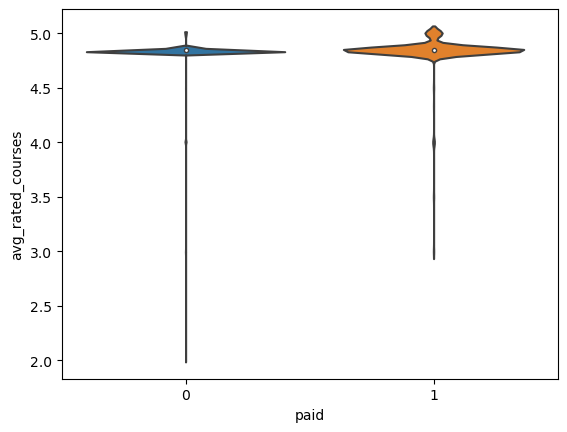

In [12]:
sns.violinplot(data=df,x='paid', y='avg_rated_courses')

**Query :** Are paid users more likely to give high ratings to courses ? 

**Answer :** As seen from above violinplot, both the paid and unpaid users have mostly given good ratings to courses. This implies that both the paid and unpaid users liked the course quality.

#### 3.6 Bivariate analysis of avg_course_watched

<AxesSubplot:xlabel='paid', ylabel='avg_course_watched'>

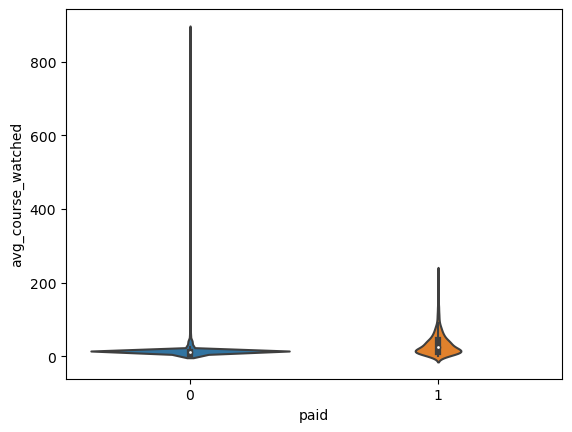

In [13]:
sns.violinplot(data=df,x='paid', y='avg_course_watched')

**Query :** Are the paid users more likely to watch course videos and see them to completion ?

**Answer :** As seen from above violinplot, paid users are more likely to watch the course than unpaid users. averge duration of course watched is therefore an important feature for predicting whether the user is likely to convert to paid user or not.

#### 3.7 Bivariate analysis of total time watched

<AxesSubplot:xlabel='paid', ylabel='total_time_watched'>

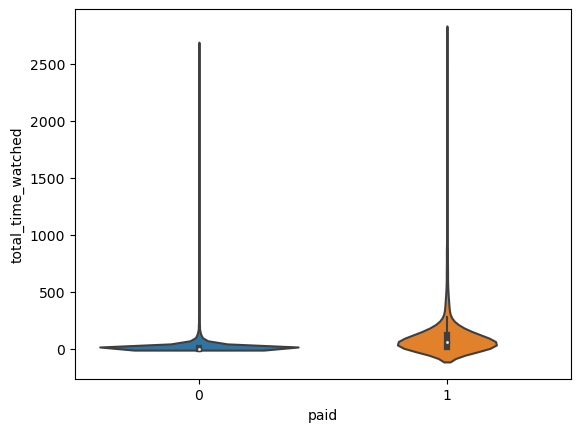

In [14]:
sns.violinplot(data=df, x='paid', y='total_time_watched')

In [27]:
df[df.paid==1].total_time_watched.describe()

count    1068.000000
mean      113.638670
std       234.817268
min         0.100000
25%        12.175000
50%        56.000000
75%       120.450000
max      2717.600000
Name: total_time_watched, dtype: float64

In [28]:
df[df.paid==0].total_time_watched.describe()

count    33095.000000
mean        11.672588
std         50.181467
min          0.000000
25%          0.100000
50%          0.100000
75%          4.400000
max       2679.400000
Name: total_time_watched, dtype: float64

**Query :** Are paid users more likely to watch videos for longer duration than unpaid ones ? 

**Answer :** As seen from above violinplot, paid users are more likely to watch videos for longer span of time than unpaid ones. This is therefore an important feature to distinguish between free and paid users.

#### 3.8 Bivariate analysis of engagement_quizzes and target variable

<AxesSubplot:xlabel='paid', ylabel='engagement_quizzes'>

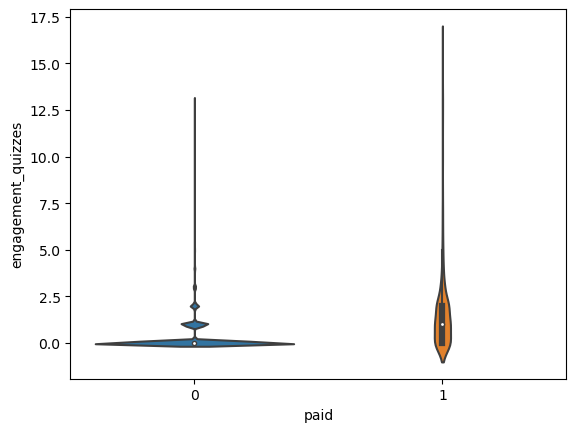

In [15]:
sns.violinplot(data=df, x='paid', y='engagement_quizzes')

In [29]:
df[df.paid==0].engagement_quizzes.describe()

count    33095.000000
mean         0.244478
std          0.683242
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: engagement_quizzes, dtype: float64

In [30]:
df[df.paid==1].engagement_quizzes.describe()

count    1068.000000
mean        1.569288
std         2.040332
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: engagement_quizzes, dtype: float64

**Query :** Are users who eventually convert to paid users more likely to attempt quizzes ?

**Answre :** Yes, as seen from above graph, users who engage with platform attempting quizzes are more likely to convert into paid users.

#### 3.8 Bivariate analysis of engagement_exams and target variable

<AxesSubplot:xlabel='paid', ylabel='engagement_exams'>

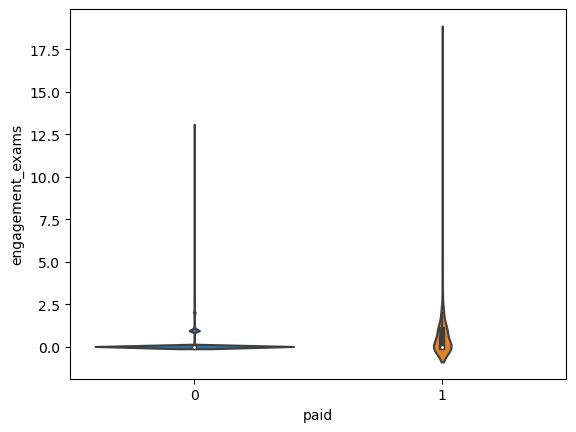

In [16]:
sns.violinplot(data=df, x='paid', y='engagement_exams')

In [17]:
df[df.paid == 0 ].engagement_exams.describe()

count    33095.000000
mean         0.085300
std          0.408786
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: engagement_exams, dtype: float64

In [18]:
df[df.paid == 1 ].engagement_exams.describe()

count    1068.000000
mean        0.826779
std         1.769510
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        18.000000
Name: engagement_exams, dtype: float64

**Query :** Which students/users are more likely to attempt exams ? free-tier ones or paid ones ?

**Answre :** The number of exams taken is very low for both paid and free-tier students. But, the students who attempt more exams are slightly more likely to eventually convert into paid users. 75% percentile value for paid users is 1 whereas it is 0 for unpaid users. This implies that one-fourth of the students that were paid users, had actually taken an exam whereas students who were free-tier users didn't take any exam.

#### 3.9 Bivariate analysis of engagement_lessons and target variable

<AxesSubplot:xlabel='paid', ylabel='engagement_lessons'>

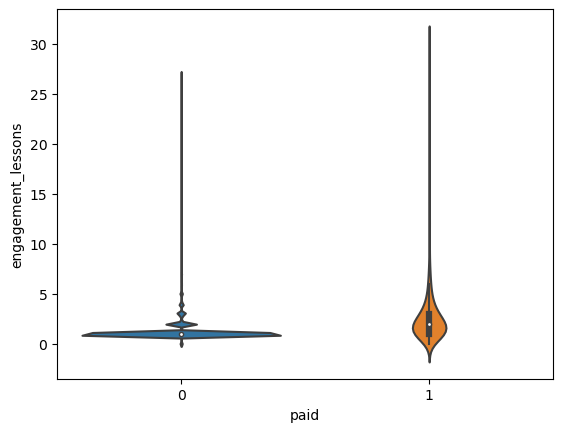

In [19]:
sns.violinplot(data=df, x='paid', y='engagement_lessons')

In [20]:
df[df.paid==0].engagement_lessons.describe()

count    33095.000000
mean         1.250823
std          0.975665
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         27.000000
Name: engagement_lessons, dtype: float64

In [21]:
df[df.paid==1].engagement_lessons.describe()

count    1068.000000
mean        3.008427
std         3.627052
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        30.000000
Name: engagement_lessons, dtype: float64

**Query :** Are users who attend lessons i.e. engage in lessons are more likely to convert into paid users ? 

**Answer :** Students who take on average 3 lessons are more likely to convet into paid users whereas free-tier users who don't engage in more than 1 lesson are more likely to stay in the same free-tier.

#### 3.10 Bivariate analysis of avg_exam_score and target variable

<AxesSubplot:xlabel='paid', ylabel='avg_exam_score'>

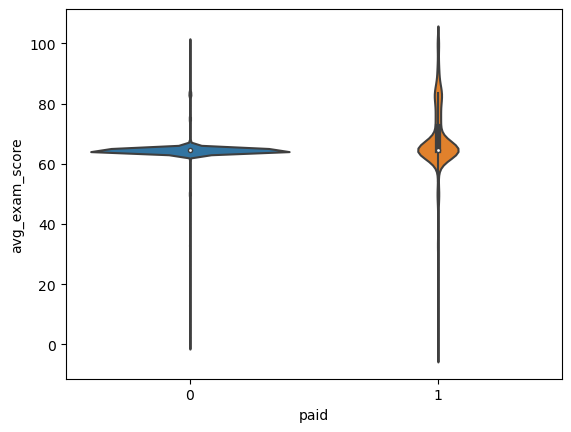

In [22]:
sns.violinplot(data=df, x='paid',y='avg_exam_score')

In [23]:
df[df.paid==0].avg_exam_score.describe()

count    33095.000000
mean        64.336878
std          6.255832
min          0.000000
25%         64.446828
50%         64.446828
75%         64.446828
max        100.000000
Name: avg_exam_score, dtype: float64

In [24]:
df[df.paid==1].avg_exam_score.describe()

count    1068.000000
mean       67.853956
std        11.772619
min         0.000000
25%        64.446828
50%        64.446828
75%        72.166667
max       100.000000
Name: avg_exam_score, dtype: float64

**Query :** On an average, are students who score well in exams more likely to convert into paid users ?

**Answer :** Well, students who come from free-tier have an average score of 64 whereas those that come from paid tier have an average score of 67. Besides, one-fourth of students from paid tier have score more than 72 marks in exam whereas same cannot be same for those who are from free-tier. Exam score therefore can be considered as one of the important features for predicting whether the user will be converted into paid user or not.


#### 3.11 Univariate analysis of no_of_questions asked by user 

<AxesSubplot:>

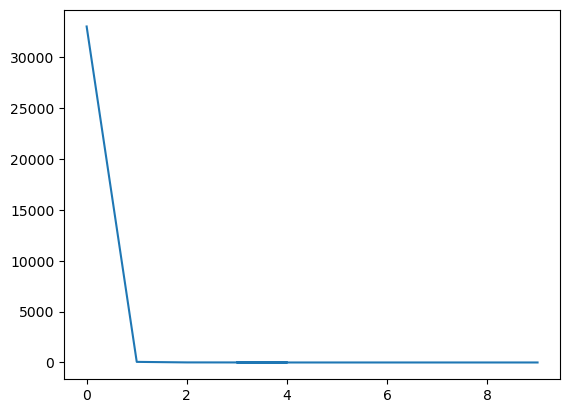

In [25]:
df[df.paid==0].no_of_questions.value_counts().plot()

<AxesSubplot:>

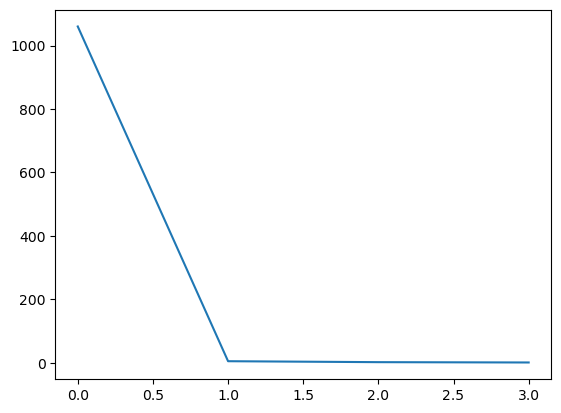

In [26]:
df[df.paid==1].no_of_questions.value_counts().plot()

**Query :** How useful is the no_of_questions asked feature to distinguish between paid and unpaid user ? Are students who convert to paid tier more likely to ask questions ? 

**Answer :** No conclusion can be derived from the no-of-questions asked by students as mostly it is 0. Overall distribution of no-of-questions asked is same for both paid and unpaid users.

### Conclusions of EDA : 

1. Data is highly imbalanced and need to be balanced.
2. Most number of students are from India, but majority of the paying students are from United States. The top 5 countries that paid users come from are different than the top 5 countries where majority of free users come from. India is the only exception to this rule, which has majority in both types of students i.e. paid and free ones. This also, implies that nationality of a country can be a good indicator of how likely the student is to convert into paid user.
3. Students who spend time watching tutorial videos are more likely to convert into paid user. If a user watched tutorials for more than 12 minutes of tutorials there is 25% chance that he/she will convert into paid tier. Similarly, if student watched as long as 56 minutes, 120 minutes, there are more than 50% and 75% chance that student will convert into paid user.
4. Students who attempt at least one quiz have 50% chance of converting to a paid user.
5. Students who engage in more than 3 lessons have 75% chance of converting to a paid user.